In [1]:
# PROGRAM 1
import pandas as pd 
import os
print(os.path.abspath('../'))
file_path = os.path.abspath('C:/Users/19b-005-se/Desktop/lab 15')
print(file_path)
train = pd.read_csv(file_path+'/train_income_data_AAII.csv') 
test = pd.read_csv(file_path+'/train_income_data_AAII.csv')


C:\Users\19b-005-se\Desktop
C:\Users\19b-005-se\Desktop\lab 15


In [21]:
# Program 2
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [23]:
# Program 3
train.shape

(32561, 12)

In [25]:
# Program 4
train.dtypes  

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [26]:
# Program 5
categorical_var = train.dtypes.loc[train.dtypes=='object'].index  
print(categorical_var)  

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [27]:
# Program 6
#Number of Unique values in each column 
train[categorical_var].apply(lambda x:len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [28]:
#Program 7
train['Workclass'].unique() 
len(train['Workclass'].unique())  

9

In [33]:
# Program 8
# Here we can see that 6 variables have less than 10 unique values but others have 15 or more unique values which seem to be too high. 
# Pandas dataframes have an inbuilt routine called value_counts which gives the count of each category. 
# We'll take 2 examples here to perform univariate analysis. 
train['Race'].unique()
# Print counts of each category 
train['Race'].value_counts() 

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [34]:
# Program 9
train['Native.Country'].value_counts()  
train['Native.Country'].value_counts()/train.shape[0]  

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [3]:
# Program 10
# Analysis of Categorical vs Categorical variables
cross_tab = pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
print(cross_tab) 


Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


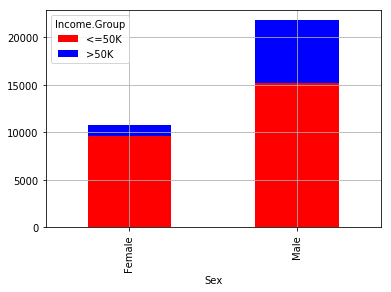

In [4]:
# Program 11
%matplotlib inline
cross_tab.iloc[:-1,:-1].plot(kind='bar',stacked=True, color=['red','blue'], grid=True)

In [8]:
# Program 12
# Lets define the above figures and charts in percentage for better analysis and comparison
def convert_percent(ct_val):  
    return ct_val/float(ct_val[-1])  
cross_tab2 = cross_tab.apply(convert_percent,axis=1)  
cross_tab2  

Income.Group,<=50K,>50K,All
Sex,,,
Female,0.890539,0.109461,1.0
Male,0.694263,0.305737,1.0
All,0.759190,0.240810,1.0


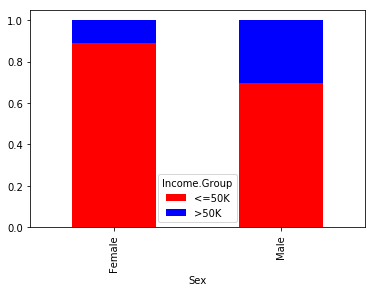

In [10]:
# Program 13
cross_tab2.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

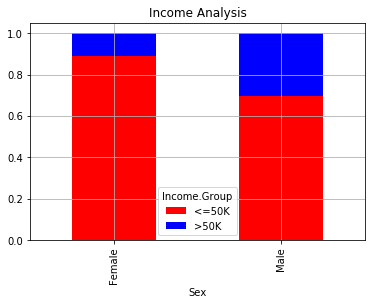

In [12]:
# Program 13
cross_tab2.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=True, title='Income Analysis') 

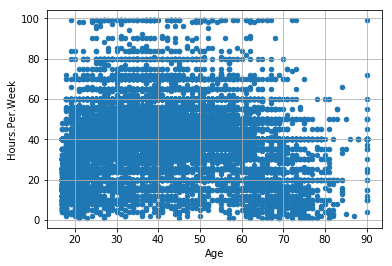

In [13]:
# Program 14
train.plot('Age','Hours.Per.Week', kind='Scatter', grid=True)  

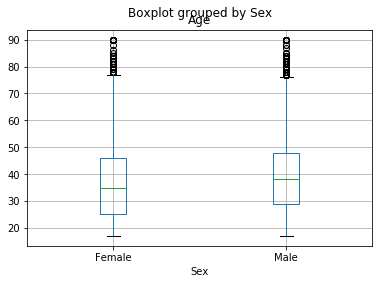

In [14]:
# Program 15
train.median()  
train.boxplot(column='Age',by='Sex')  

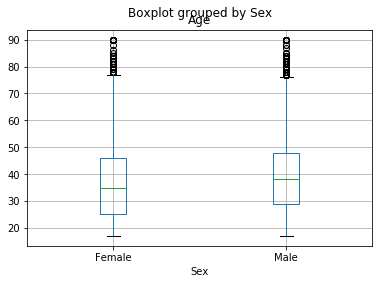

In [15]:
# Program 16
train.boxplot(column='Age',by='Sex') 

In [16]:
# Programm 17
df_male = train.loc[train['Sex']=='Male'] 
df_male.head() 
df_male.median()
df_male.describe() 

,ID,Age,Hours.Per.Week
count,21790.000000,21790.000000,21790.000000
mean,16264.666223,39.433547,42.428086
std,9412.830322,13.370630,12.119755
min,1.000000,17.000000,1.000000
25%,8124.250000,29.000000,40.000000
50%,16250.500000,38.000000,40.000000
75%,24421.750000,48.000000,49.000000
max,32560.000000,90.000000,99.000000


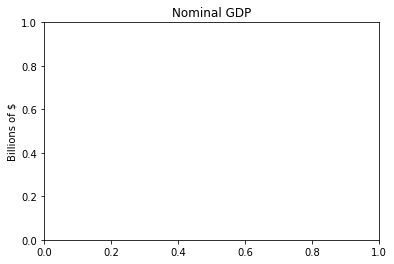

In [24]:
# program 18
import matplotlib.pyplot as plt  
from collections import Counter  
def make_chart_simple_line_chart(plt):  
    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]    
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]  
 
 # create a line chart, years on x-axis, gdp on y-axis  
    plt.plot(years, gdp, color='green', marker='o', linestyle='solid')   
# add a title  
plt.title("Nominal GDP")  
 
# add a label to the y-axis   
plt.ylabel("Billions of $")    
plt.show()  
